<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

- Aim of this lab is to get better than the baseline score

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data", delimiter=',')
data.head(1)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1


In [4]:
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
#check for duplicate entries. found 215
print(data.duplicated().value_counts())

False    533
True     215
dtype: int64


In [7]:
#drop duplicate entries
data = data[~data.duplicated()]

In [8]:
#check dataset for nulls and explore columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            533 non-null    int64
 1   Frequency (times)                           533 non-null    int64
 2   Monetary (c.c. blood)                       533 non-null    int64
 3   Time (months)                               533 non-null    int64
 4   whether he/she donated blood in March 2007  533 non-null    int64
dtypes: int64(5)
memory usage: 25.0 KB


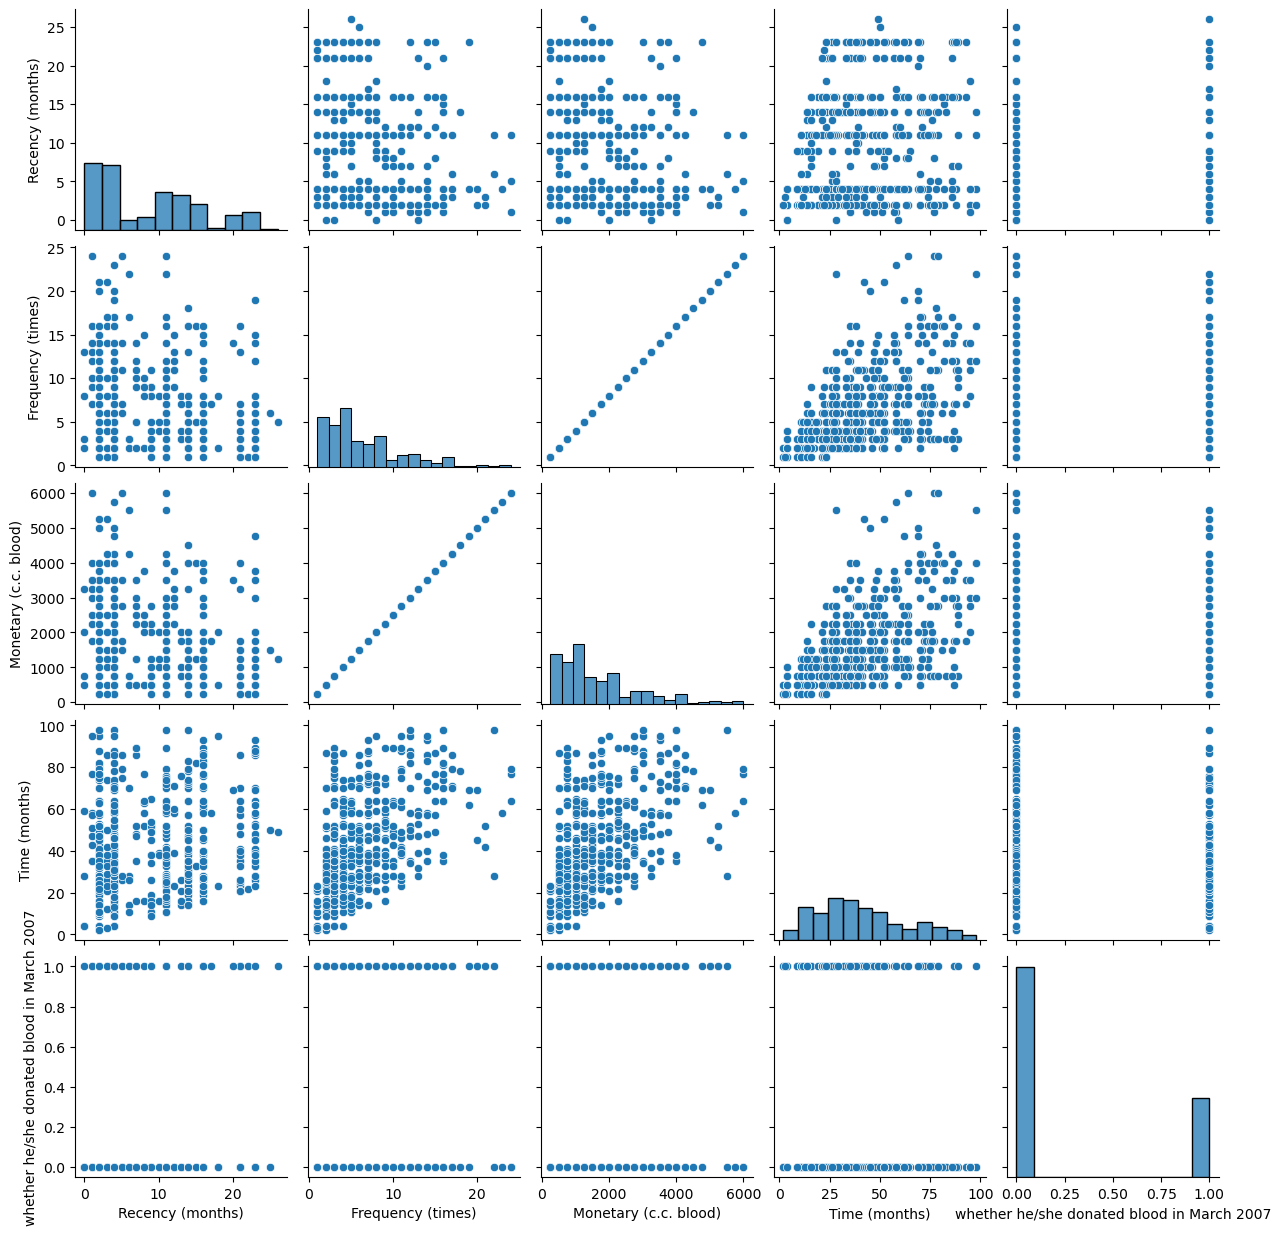

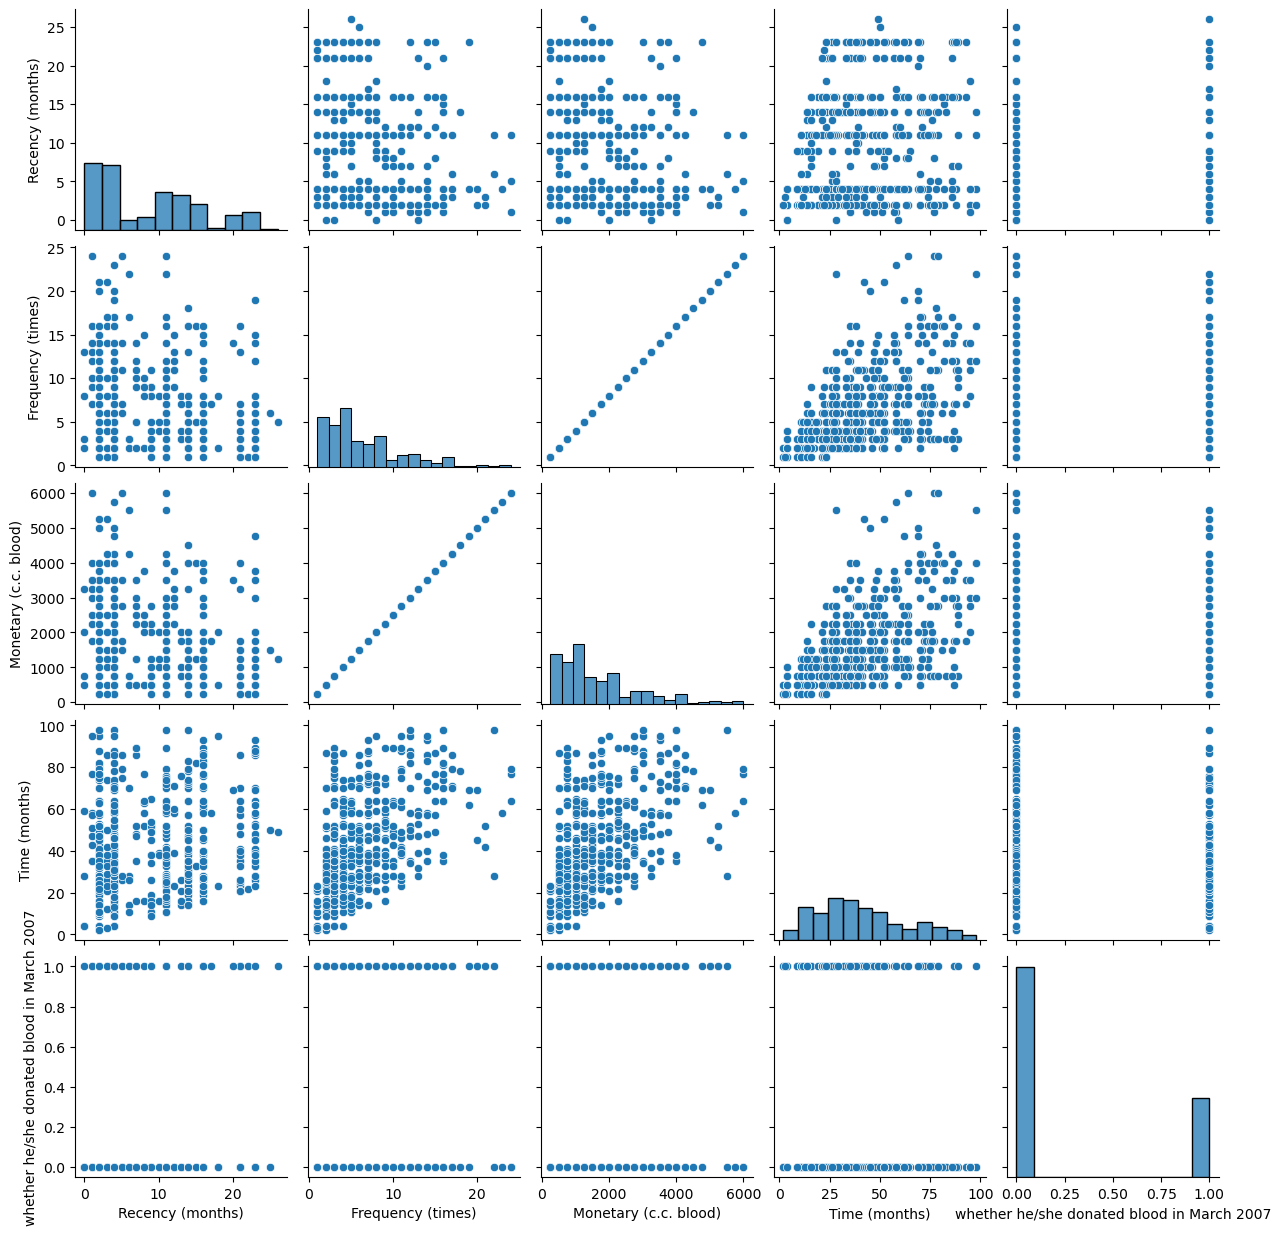

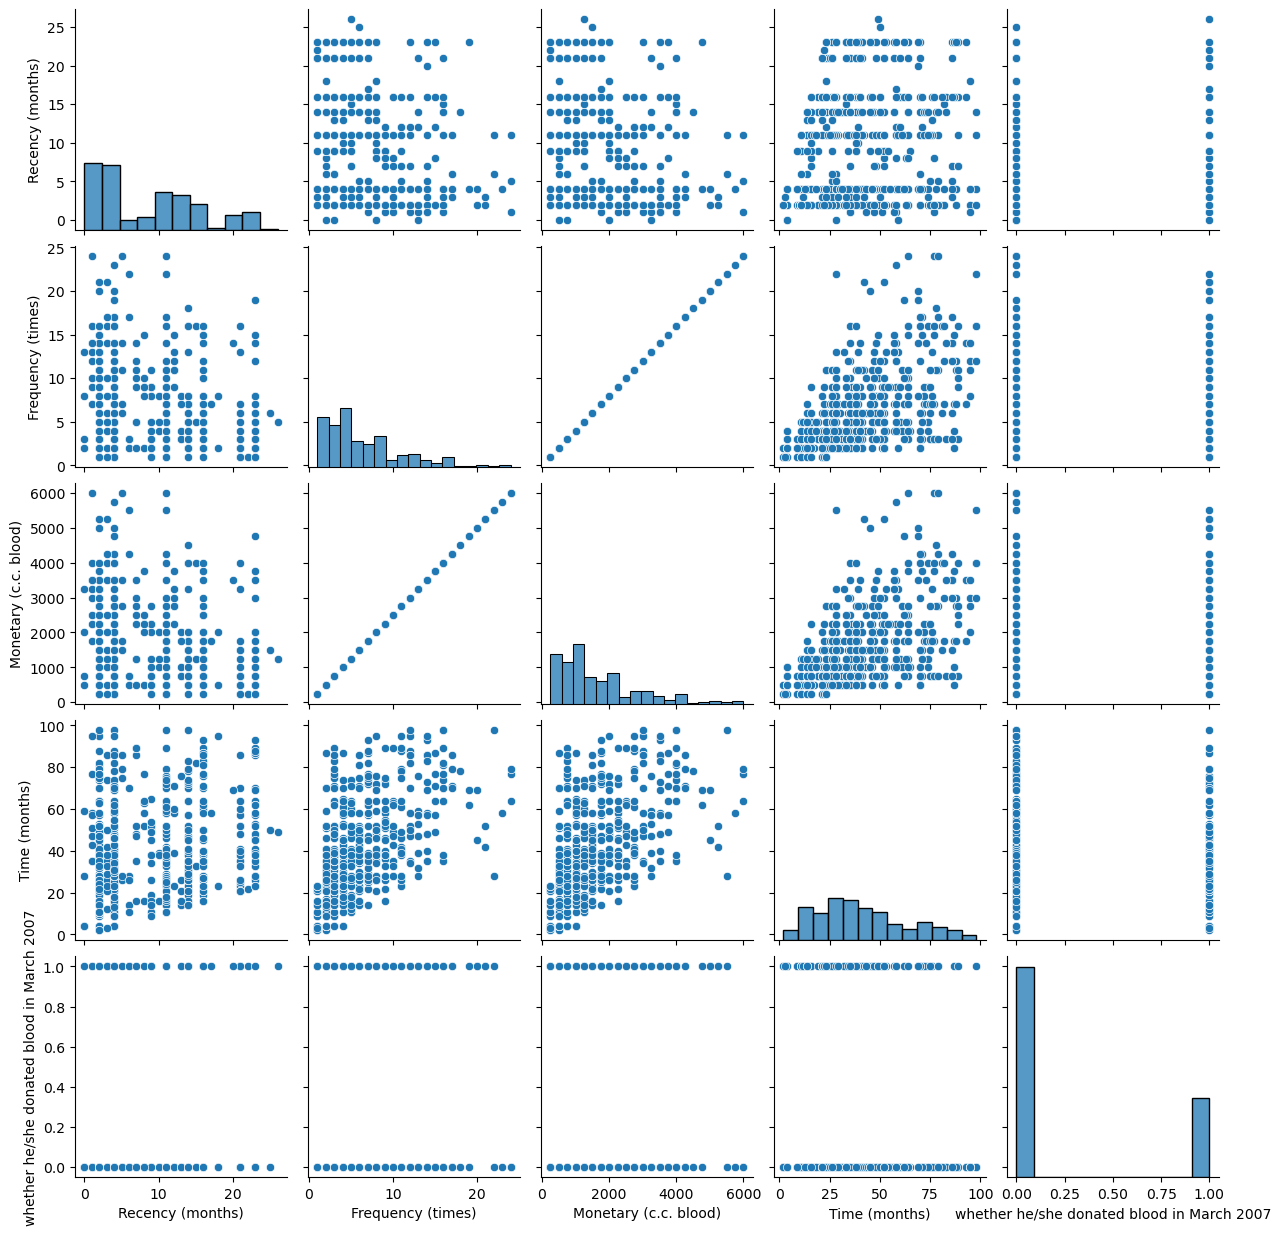

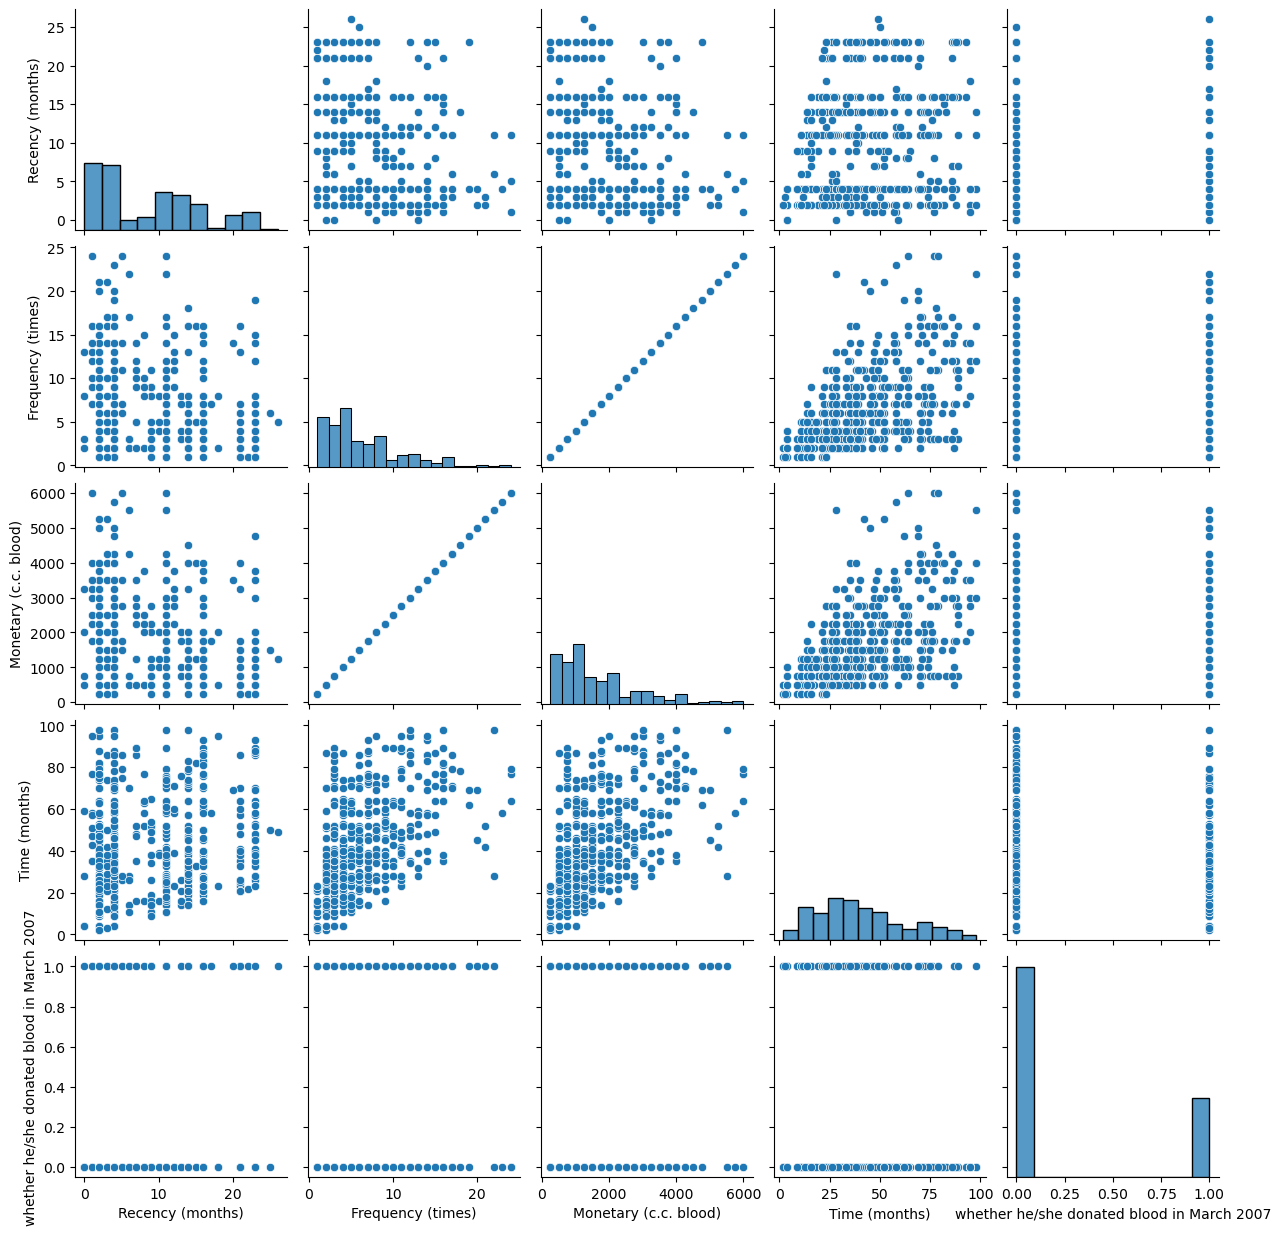

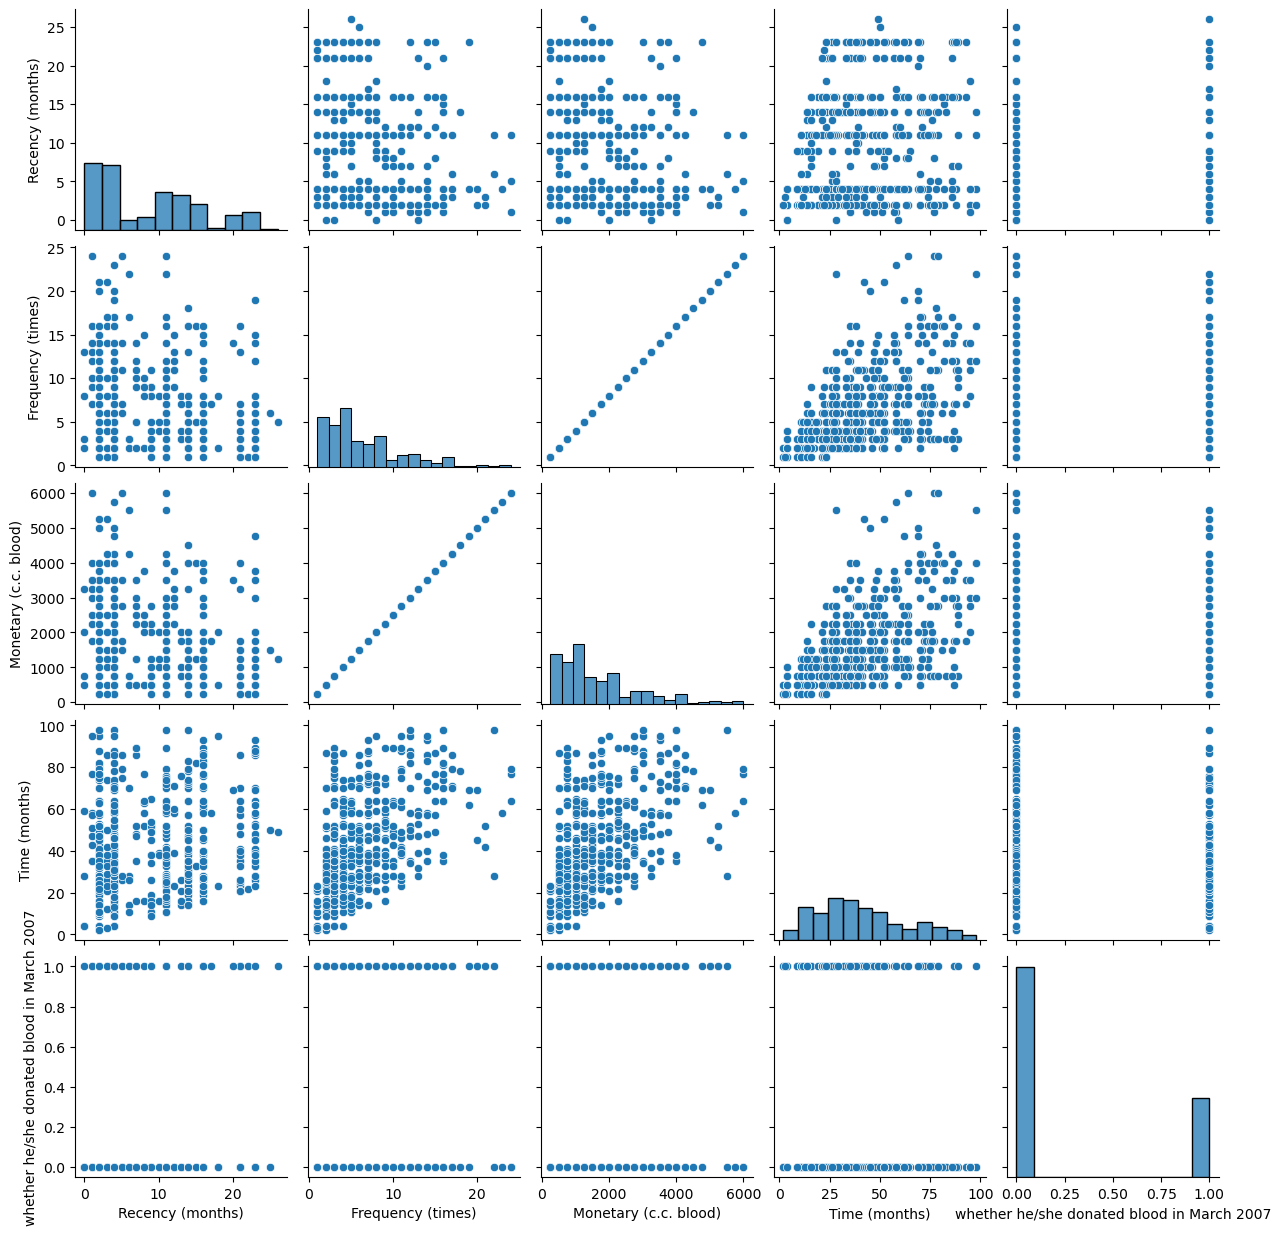

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.show()

In [46]:
#from pairplot it looks like we should normalize the predictors

In [9]:
# finding the range of values
min_max = {}
for i in data.columns:
    val_max = data[i].max()
    val_min = data[i].min()
    min_max[i] = [val_min,val_max]
    
for i in min_max:
    print(f'{i}  min = {min_max[i][1]}, max = {min_max[i][0]}')

Recency (months)  min = 74, max = 0
Frequency (times)  min = 50, max = 1
Monetary (c.c. blood)  min = 12500, max = 250
Time (months)  min = 98, max = 2
whether he/she donated blood in March 2007  min = 1, max = 0


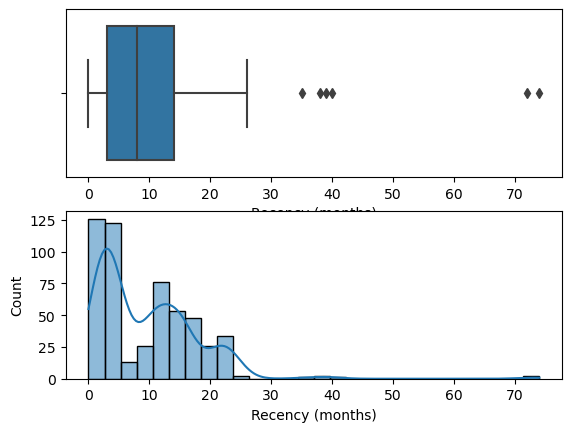

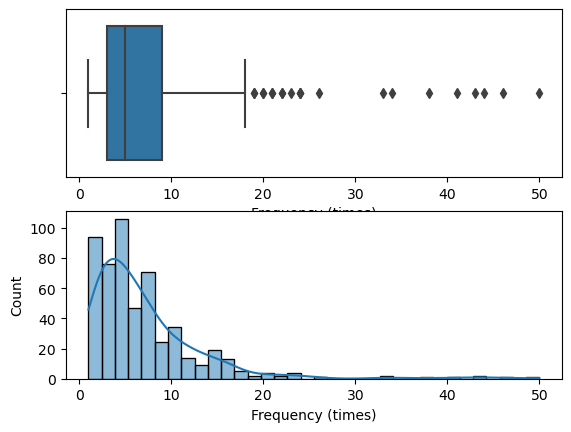

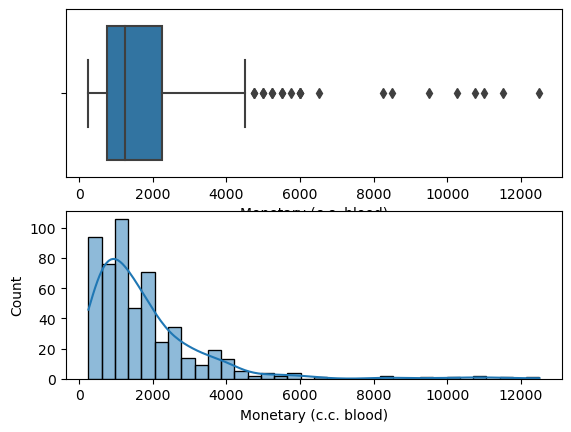

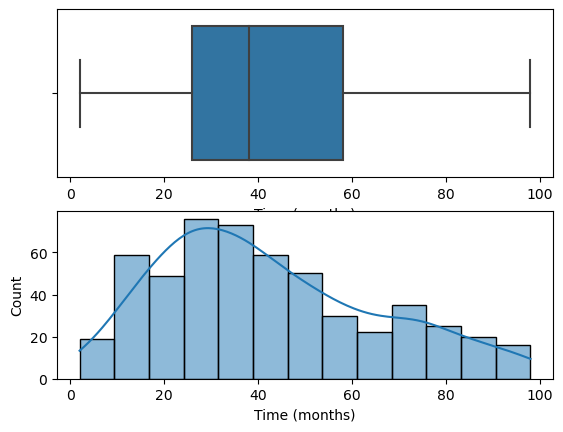

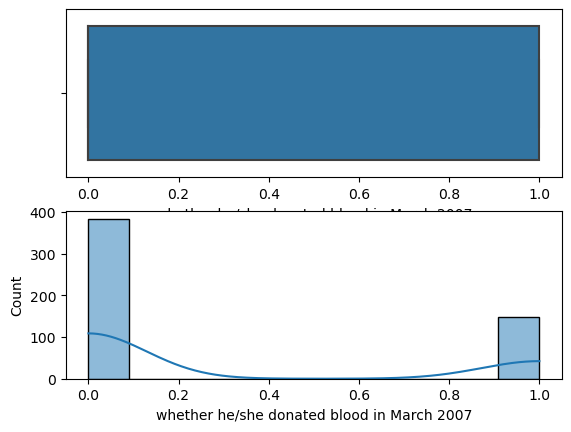

In [10]:
for i in data.columns:
    fig, axs = plt.subplots(2)
    ax_box = axs[0]
    ax_box = sns.boxplot(x = data[i], ax = ax_box)
    ax_hist = axs[1]
    ax_hist = sns.histplot(x = data[i], ax = ax_hist, kde = True)
    plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [11]:
#remove outliers that have a zscore of more than 3
from scipy import stats
import numpy as np 

data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 1 to 745
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            518 non-null    int64
 1   Frequency (times)                           518 non-null    int64
 2   Monetary (c.c. blood)                       518 non-null    int64
 3   Time (months)                               518 non-null    int64
 4   whether he/she donated blood in March 2007  518 non-null    int64
dtypes: int64(5)
memory usage: 24.3 KB


In [14]:
#set predictors and target
X = data.iloc[:, 0:3]
y = data[['whether he/she donated blood in March 2007']]

In [15]:
y.value_counts()

whether he/she donated blood in March 2007
0                                             376
1                                             142
dtype: int64

In [16]:
print(X.describe())

       Recency (months)  Frequency (times)  Monetary (c.c. blood)
count        518.000000         518.000000             518.000000
mean           9.148649           6.492278            1623.069498
std            6.844438           4.536435            1134.108789
min            0.000000           1.000000             250.000000
25%            3.000000           3.000000             750.000000
50%            8.000000           5.000000            1250.000000
75%           14.000000           8.750000            2187.500000
max           26.000000          24.000000            6000.000000


# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
print(f'X_train size = {len(X_train)}')
print(f'X_test size = {len(X_test)}')
print(f'y_train size = {len(y_train)}')
print(f'y_test size = {len(y_test)}')

X_train size = 414
X_test size = 104
y_train size = 414
y_test size = 104


In [22]:
y_test.value_counts()

whether he/she donated blood in March 2007
0                                             75
1                                             29
dtype: int64

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [19]:
model = DecisionTreeClassifier()

# Step 9: Fit the Model

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [25]:
y_train_pred = model.predict(X_train)
y_train_pred_prob = model.predict_proba(X_train)

In [26]:
train_tn, train_fp, train_fn, train_tp = metrics.confusion_matrix(y_train, y_train_pred).ravel()
train_cm = pd.DataFrame(index = ['Predicted Positive', 'Predicted Negative'], columns = ['Actual Positive', 'Actual Negative'])
train_cm.iloc[0,0] = train_tp
train_cm.iloc[0,1] = train_fp
train_cm.iloc[1,0] = train_fn
train_cm.iloc[1,1] = train_tn
train_cm

,Actual Positive,Actual Negative
Predicted Positive,52,12
Predicted Negative,61,289


In [27]:
accuracy_score = metrics.accuracy_score(y_train, y_train_pred)
accuracy_score

0.8236714975845411

In [28]:
recall_score = metrics.recall_score(y_train, y_train_pred)
recall_score

0.46017699115044247

In [29]:
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_pred)
train_rocauc = metrics.auc(fpr,tpr)

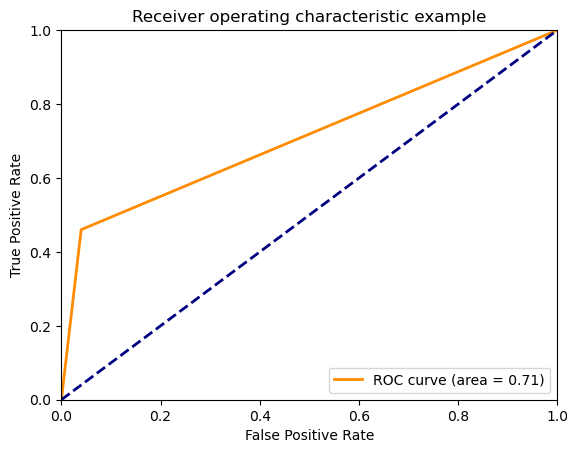

In [30]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % train_rocauc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [31]:
y_test_pred = model.predict(X_test)
y_test_pred_prob = model.predict_proba(X_test)

In [32]:
test_tn, test_fp, test_fn, test_tp = metrics.confusion_matrix(y_test, y_test_pred).ravel()
test_cm = pd.DataFrame(index = ['Predicted Positive', 'Predicted Negative'], columns = ['Actual Positive', 'Actual Negative'])
test_cm.iloc[0,0] = test_tp
test_cm.iloc[0,1] = test_fp
test_cm.iloc[1,0] = test_fn
test_cm.iloc[1,1] = test_tn
test_cm

,Actual Positive,Actual Negative
Predicted Positive,8,8
Predicted Negative,21,67


In [33]:
accuracy_score = metrics.accuracy_score(y_test, y_test_pred)
accuracy_score

0.7211538461538461

In [34]:
recall_score = metrics.recall_score(y_test, y_test_pred)
recall_score

0.27586206896551724

In [35]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_pred)
test_rocauc = metrics.auc(fpr,tpr)

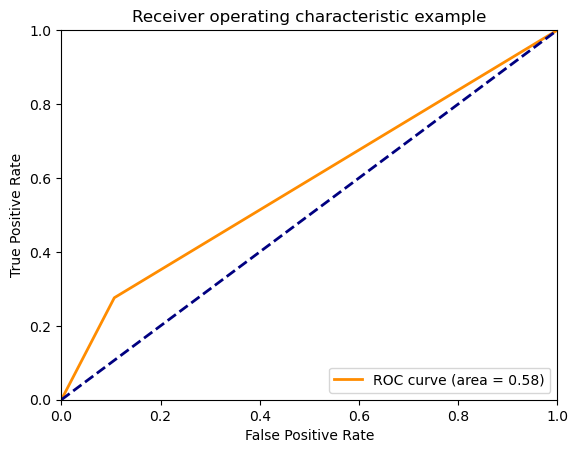

In [36]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % test_rocauc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



